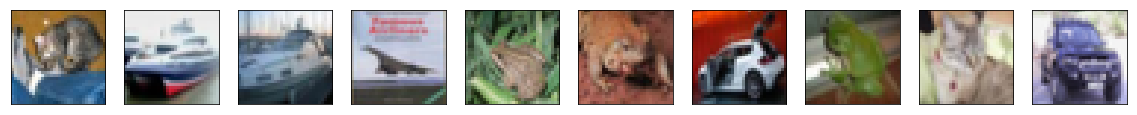

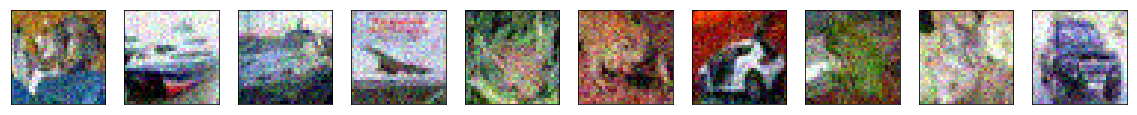

In [4]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = '/media/tadenoud/DATADisk/datasets'
use_cuda = True

def show_10_images(data):    
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(data[i].reshape(32, 32, 3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

show_10_images(x_test)
show_10_images(x_test_noisy)

In [8]:
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import UpSampling2D, Flatten, Dense, Reshape, Activation
from keras.regularizers import l1
from keras.models import Model

def create_model(i):
    n_hidden = 512
    input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

    x = Conv2D(32, (3, 3), padding='same')(input_img)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(2, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # at this point the representation is (8, 8, 32)

    x = Flatten()(x)
    encoded = Dense(n_hidden, activity_regularizer=l1(10e-8))(x)

    # representation is now size n_hidden

    x = Dense(8 * 8 * 32)(encoded)
    x = Reshape((8, 8, 32))(x)

    x = Conv2D(2, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(3, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    decoded = Activation('sigmoid')(x)

    model = Model(input_img, decoded)
       
    # Change layer names to prevent weight sharing
    for i, layer in enumerate(model.layers):
        layer.name = 'layer'+str(i)+'_model'
        
    return model

Training autoencoder 0


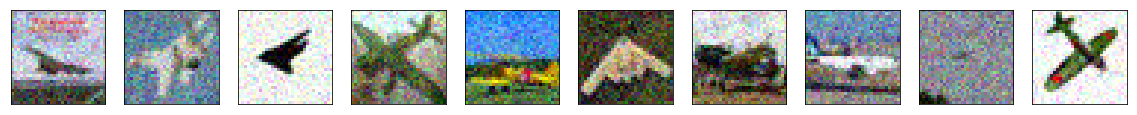

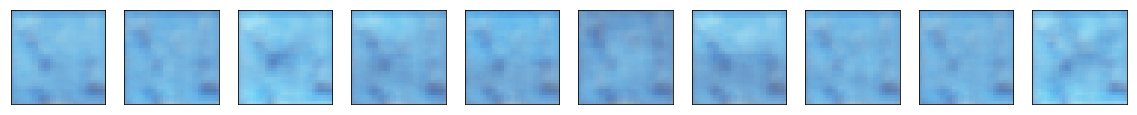

Training autoencoder 1


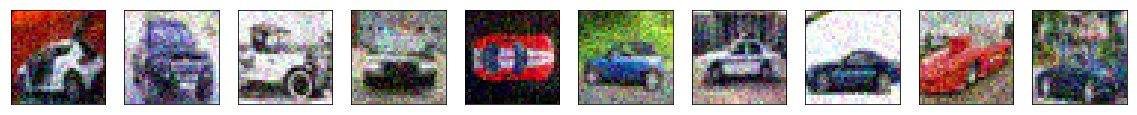

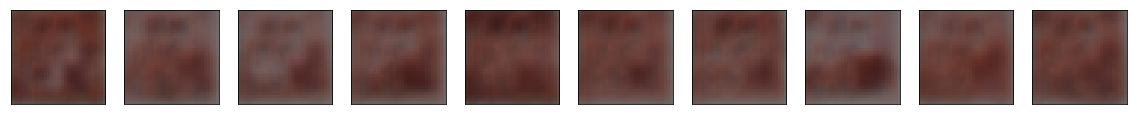

Training autoencoder 2


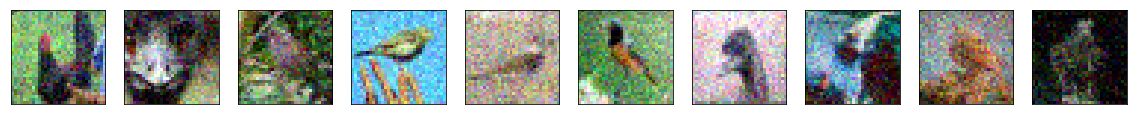

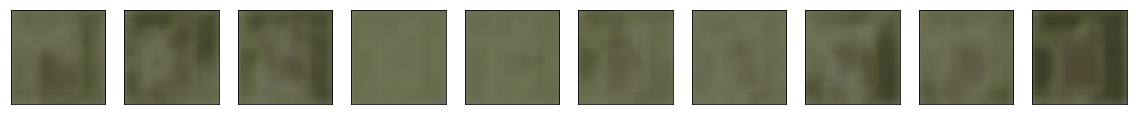

Training autoencoder 3
Train on 5000 samples, validate on 1000 samples
Epoch 1/100
5000/5000 [==============================] - 5s 988us/step - loss: 0.6511 - val_loss: 0.6976
Epoch 2/100
5000/5000 [==============================] - 1s 104us/step - loss: 0.6115 - val_loss: 0.6939
Epoch 3/100
5000/5000 [==============================] - 1s 106us/step - loss: 0.6021 - val_loss: 0.6940
Epoch 4/100
5000/5000 [==============================] - 1s 104us/step - loss: 0.5973 - val_loss: 0.6954
Epoch 5/100
5000/5000 [==============================] - 1s 105us/step - loss: 0.5937 - val_loss: 0.6938
Epoch 6/100
5000/5000 [==============================] - 1s 106us/step - loss: 0.5906 - val_loss: 0.6939
Epoch 7/100
5000/5000 [==============================] - 1s 105us/step - loss: 0.5884 - val_loss: 0.7031
Epoch 8/100
5000/5000 [==============================] - 1s 105us/step - loss: 0.5863 - val_loss: 0.7081
Epoch 9/100
5000/5000 [==============================] - 1s 105us/step - loss: 0.5850 - v

5000/5000 [==============================] - 1s 106us/step - loss: 0.5701 - val_loss: 0.8249
Epoch 78/100
5000/5000 [==============================] - 1s 104us/step - loss: 0.5701 - val_loss: 0.8289
Epoch 79/100
5000/5000 [==============================] - 1s 103us/step - loss: 0.5700 - val_loss: 0.8286
Epoch 80/100
5000/5000 [==============================] - 1s 106us/step - loss: 0.5701 - val_loss: 0.8566
Epoch 81/100
5000/5000 [==============================] - 1s 103us/step - loss: 0.5701 - val_loss: 0.8653
Epoch 82/100
5000/5000 [==============================] - 1s 105us/step - loss: 0.5700 - val_loss: 0.8749
Epoch 83/100
5000/5000 [==============================] - 1s 105us/step - loss: 0.5698 - val_loss: 0.8454
Epoch 84/100
5000/5000 [==============================] - 1s 105us/step - loss: 0.5698 - val_loss: 0.8392
Epoch 85/100
5000/5000 [==============================] - 1s 106us/step - loss: 0.5698 - val_loss: 0.8509
Epoch 86/100
5000/5000 [==============================] - 1

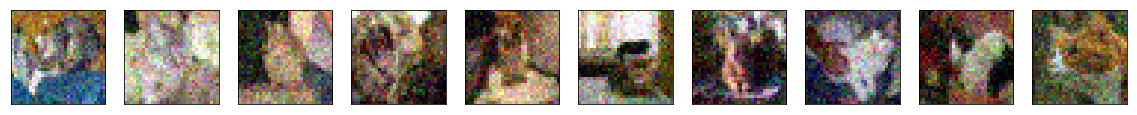

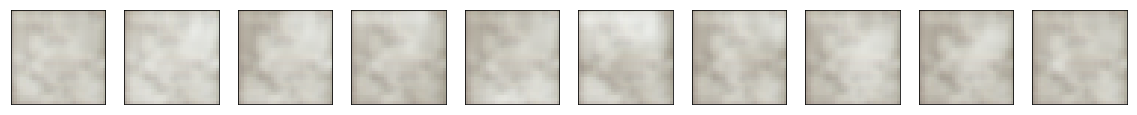

Training autoencoder 4
Train on 5000 samples, validate on 1000 samples
Epoch 1/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6735 - val_loss: 0.7036
Epoch 2/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6396 - val_loss: 0.6974
Epoch 3/100
5000/5000 [==============================] - 1s 107us/step - loss: 0.6321 - val_loss: 0.6952
Epoch 4/100
5000/5000 [==============================] - 1s 107us/step - loss: 0.6275 - val_loss: 0.6891
Epoch 5/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6243 - val_loss: 0.6894
Epoch 6/100
5000/5000 [==============================] - 1s 107us/step - loss: 0.6219 - val_loss: 0.6852
Epoch 7/100
5000/5000 [==============================] - 1s 109us/step - loss: 0.6200 - val_loss: 0.6844
Epoch 8/100
5000/5000 [==============================] - 1s 109us/step - loss: 0.6186 - val_loss: 0.6829
Epoch 9/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6173 - val

5000/5000 [==============================] - 1s 107us/step - loss: 0.6035 - val_loss: 0.6739
Epoch 78/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6038 - val_loss: 0.6737
Epoch 79/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6036 - val_loss: 0.6746
Epoch 80/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6034 - val_loss: 0.6746
Epoch 81/100
5000/5000 [==============================] - 1s 109us/step - loss: 0.6034 - val_loss: 0.6742
Epoch 82/100
5000/5000 [==============================] - 1s 110us/step - loss: 0.6034 - val_loss: 0.6743
Epoch 83/100
5000/5000 [==============================] - 1s 109us/step - loss: 0.6034 - val_loss: 0.6744
Epoch 84/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6034 - val_loss: 0.6747
Epoch 85/100
5000/5000 [==============================] - 1s 108us/step - loss: 0.6034 - val_loss: 0.6745
Epoch 86/100
5000/5000 [==============================] - 1

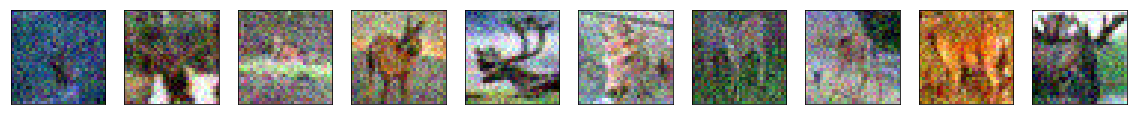

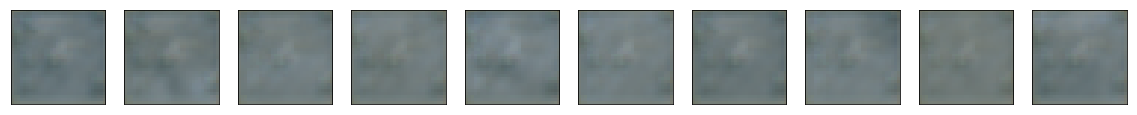

Training autoencoder 5
Train on 5000 samples, validate on 1000 samples
Epoch 1/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6671 - val_loss: 0.6941
Epoch 2/100
5000/5000 [==============================] - 1s 115us/step - loss: 0.6217 - val_loss: 0.6906
Epoch 3/100
5000/5000 [==============================] - 1s 113us/step - loss: 0.6124 - val_loss: 0.6904
Epoch 4/100
5000/5000 [==============================] - 1s 111us/step - loss: 0.6069 - val_loss: 0.6904
Epoch 5/100
5000/5000 [==============================] - 1s 112us/step - loss: 0.6032 - val_loss: 0.6934
Epoch 6/100
5000/5000 [==============================] - 1s 106us/step - loss: 0.6007 - val_loss: 0.6907
Epoch 7/100
5000/5000 [==============================] - 1s 109us/step - loss: 0.5981 - val_loss: 0.6958
Epoch 8/100
5000/5000 [==============================] - 1s 106us/step - loss: 0.5961 - val_loss: 0.6994
Epoch 9/100
5000/5000 [==============================] - 1s 106us/step - loss: 0.5950 - val

KeyboardInterrupt: 

In [11]:
import os, gc
autoencoders = [create_model(i) for i in range(10)]

for i in range(10):
    print("Training autoencoder", i)
    autoencoders[i].compile(optimizer='adadelta', loss='binary_crossentropy')
    
    f = y_train == i
    x_train_noisy_filtered = x_train_noisy[f]
    x_train_filtered = x_train[f]
    
    f = y_test == i
    x_test_noisy_filtered = x_test_noisy[f]
    x_test_filtered = x_test[f]
    
    weight_file = './weights/cifar10_autoencoder_digit_%d_binary_crossentropy_noise.hd5' % i
    if(os.path.exists(weight_file)):
        autoencoders[i].load_weights(weight_file)
    else:
        autoencoders[i].fit(x_train_noisy_filtered, x_train_filtered,
                        epochs=100,
                        batch_size=128,
                        shuffle=True,
                        validation_data=(x_test_noisy_filtered, x_test_filtered),
                        callbacks=[])
        autoencoders[i].save_weights(weight_file)
    
    show_10_images(x_test_noisy_filtered)
    show_10_images(autoencoders[i].predict(x_test_noisy_filtered))    

In [4]:
from keras.layers import Lambda
from keras.losses import binary_crossentropy
import keras.backend as K 

input_ = Input(shape=(28, 28, 1))
predictions = [l(input_) for l in autoencoders]
losses = [
    Lambda(lambda x: binary_crossentropy(
        K.batch_flatten(input_), 
        K.batch_flatten(x))
    )(p) for p in predictions]

# min_loss = Lambda(lambda a: K.min(a))(losses)

# anomaly_detector = Model(input_, min_loss)
anomaly_detector = Model(input_, losses)

In [5]:
def min_max_scale(value, min_, max_):
    return (value - min_) / (max_ - min_)

def min_max_scale_array(values, mins, maxes):
    return (values - mins) / (maxes - mins)

mins = []
maxes = []

for i in range(10):
    losses = anomaly_detector.predict(x_train[y_train == i])
    mins.append(np.min(losses))
    maxes.append(np.max(losses))
    
mins = np.array(mins)
maxes = np.array(maxes)

In [17]:
# Evaluate accuracy of autoencoders as a classifier

losses = anomaly_detector.predict(x_test)
losses = np.array(losses).T
losses = [min_max_scale_array(x, mins, maxes) for x in losses]

pred = np.argmin(losses, axis=1)
acc = np.sum((pred == y_test).astype(np.int)) / len(y_test)

print("Model accuracy", acc)

Model accuracy 0.7142


## Fashion MNIST

ground truth


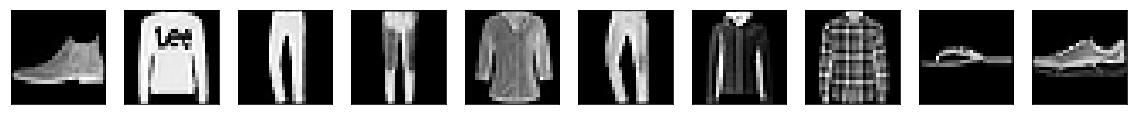

autoencoder 0


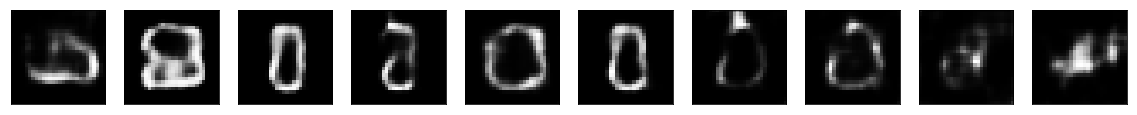

autoencoder 1


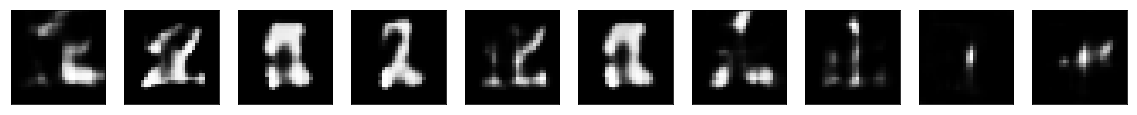

autoencoder 2


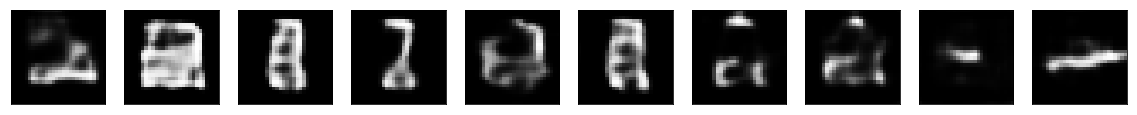

autoencoder 3


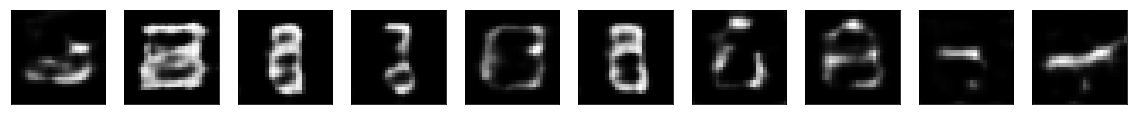

autoencoder 4


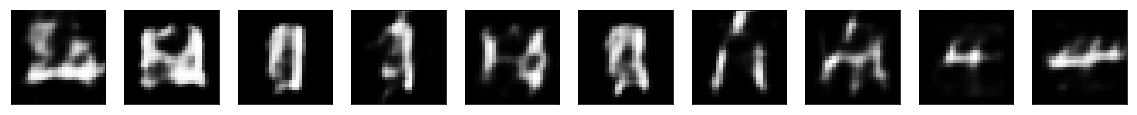

autoencoder 5


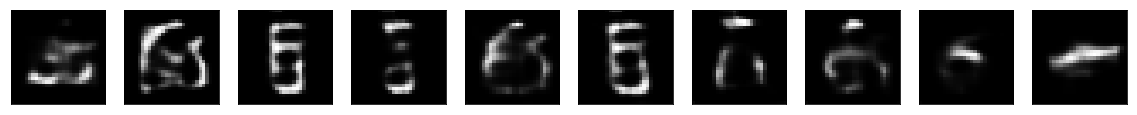

autoencoder 6


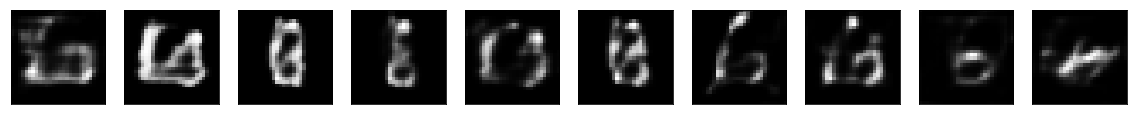

autoencoder 7


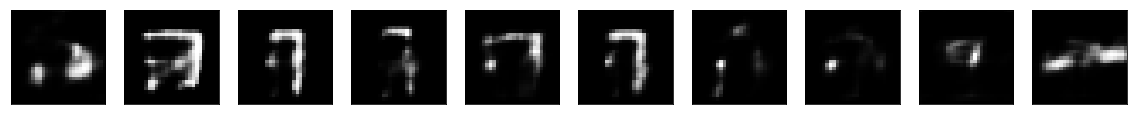

autoencoder 8


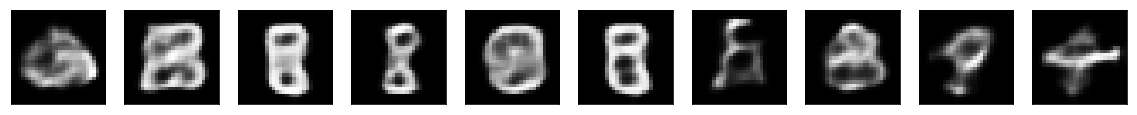

autoencoder 9


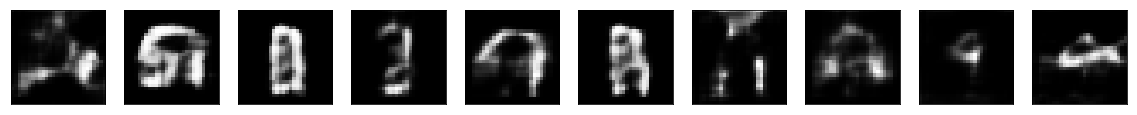

In [6]:
from keras.datasets import fashion_mnist
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

_, (fashion_x_test, _) = fashion_mnist.load_data()

fashion_x_test = fashion_x_test.astype('float32') / 255.
fashion_x_test = np.reshape(fashion_x_test, (len(x_test), 28, 28, 1))

print("ground truth")
show_10_images(fashion_x_test)
for i in range(10):
    print("autoencoder", i)
    show_10_images(autoencoders[i].predict(fashion_x_test))

In [7]:
labels = len(x_test) * [0] + len(fashion_x_test) * [1]
test_samples = np.concatenate((x_test, fashion_x_test))

losses = anomaly_detector.predict(test_samples)
losses = np.array(losses).T
losses = [min_max_scale_array(x, mins, maxes) for x in losses]
losses = np.min(losses, axis=1)

print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.99977995


## EMNIST Letters

ground truth


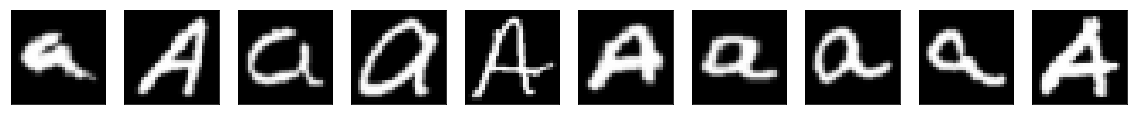

autoencoder 0


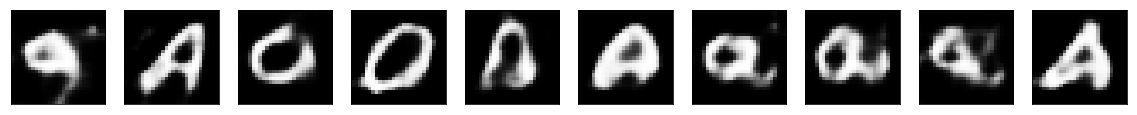

autoencoder 1


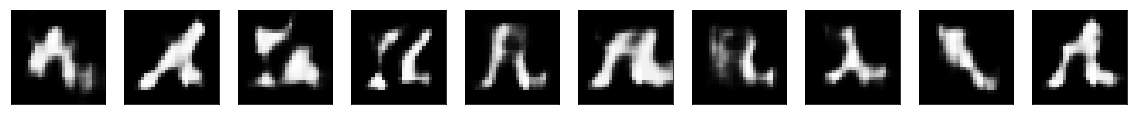

autoencoder 2


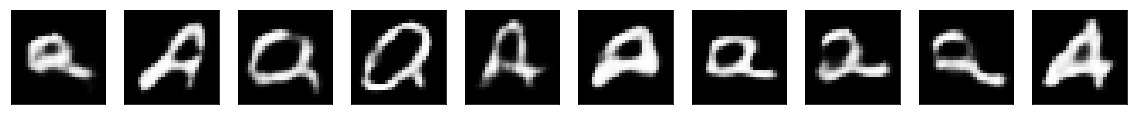

autoencoder 3


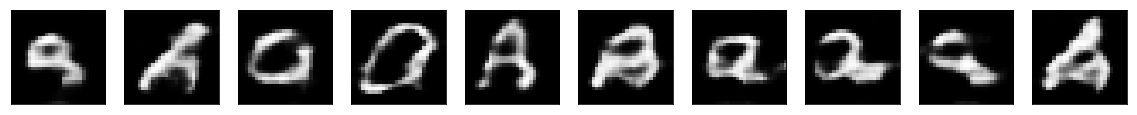

autoencoder 4


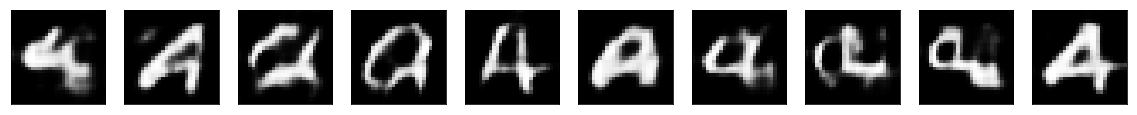

autoencoder 5


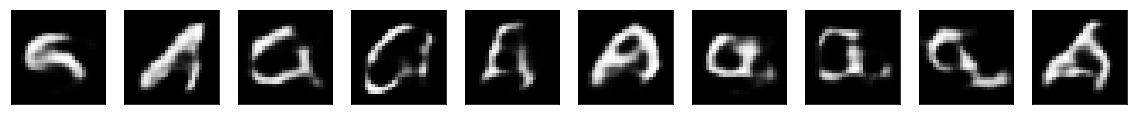

autoencoder 6


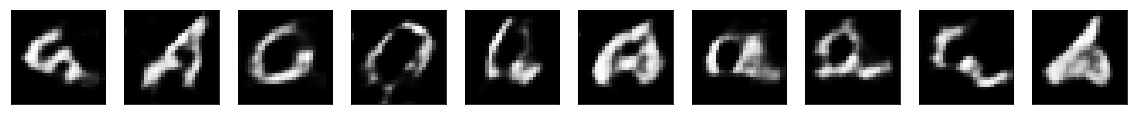

autoencoder 7


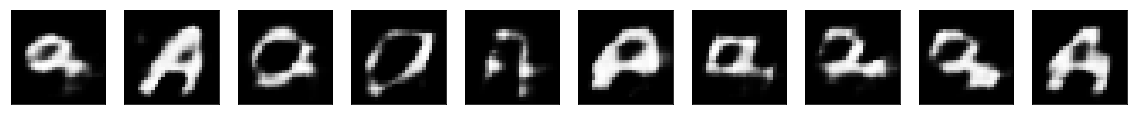

autoencoder 8


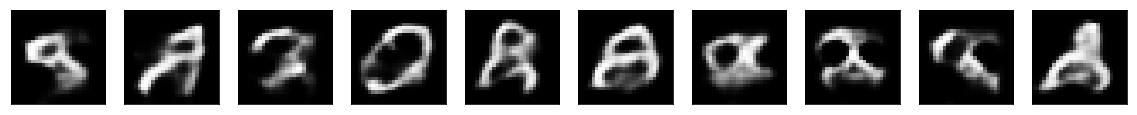

autoencoder 9


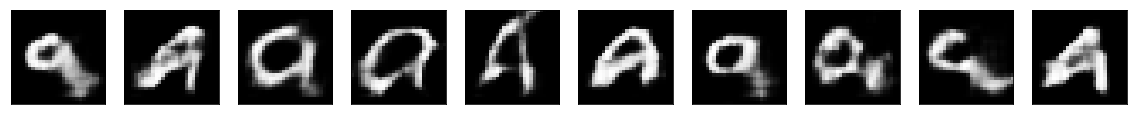

In [8]:
from torchvision.datasets import EMNIST

emnist_letters = EMNIST('./', "letters", train=False, download=True)
emnist_letters = emnist_letters.test_data.numpy()
emnist_letters = emnist_letters.astype('float32') / 255.

emnist_letters = np.reshape(emnist_letters, (len(emnist_letters), 28, 28, 1))
emnist_letters = np.swapaxes(emnist_letters, 1, 2)

print("ground truth")
show_10_images(emnist_letters)
for i in range(10):
    print("autoencoder", i)
    show_10_images(autoencoders[i].predict(emnist_letters))

In [9]:
labels = len(x_test) * [0] + len(emnist_letters) * [1]
test_samples = np.concatenate((x_test, emnist_letters))

losses = anomaly_detector.predict(test_samples)
losses = np.array(losses).T
losses = [min_max_scale_array(x, mins, maxes) for x in losses]
losses = np.min(losses, axis=1)

print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.9527228485576922


## Gaussian noise

ground truth


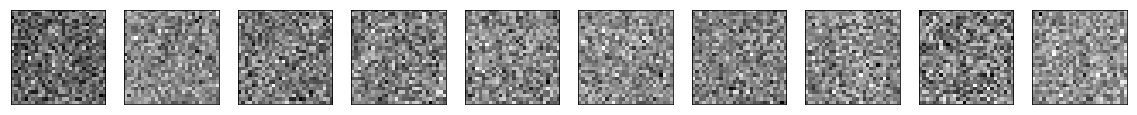

autoencoder 0


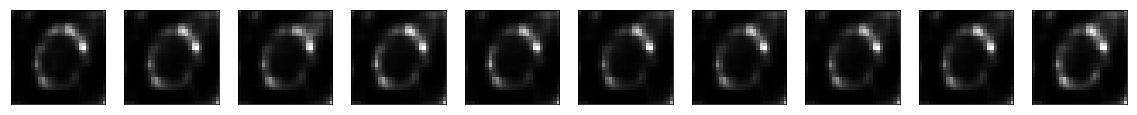

autoencoder 1


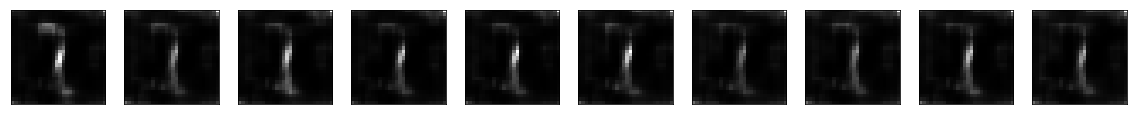

autoencoder 2


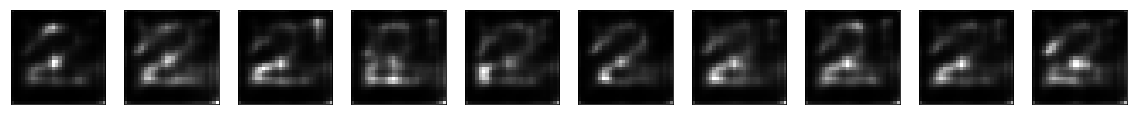

autoencoder 3


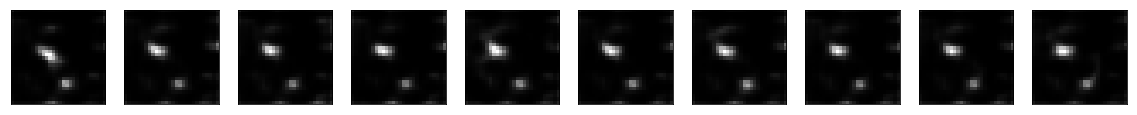

autoencoder 4


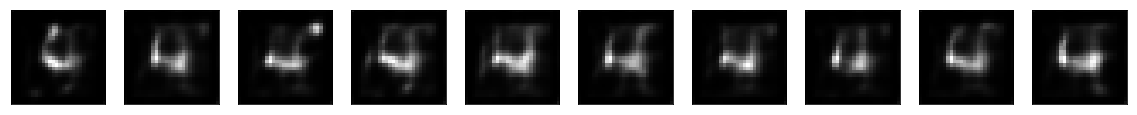

autoencoder 5


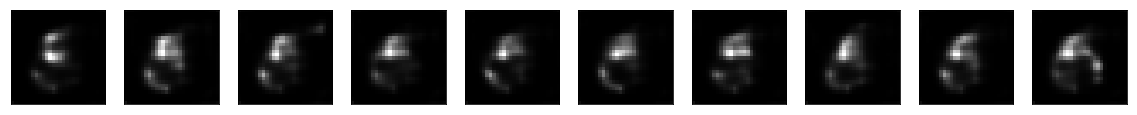

autoencoder 6


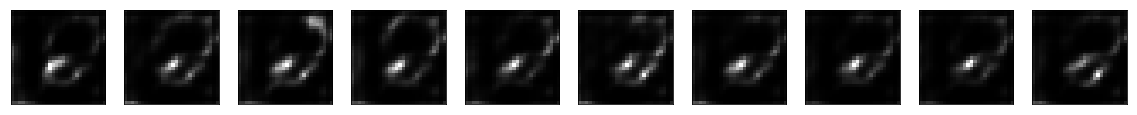

autoencoder 7


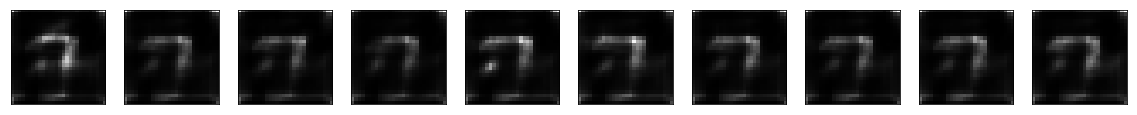

autoencoder 8


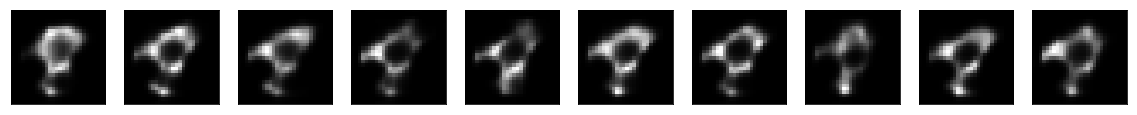

autoencoder 9


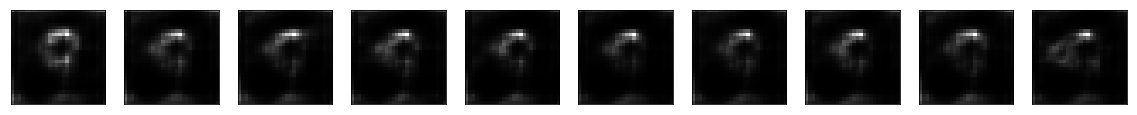

In [10]:
mnist_mean = np.mean(x_train)
mnist_std = np.std(x_train)
gaussian_data = np.random.normal(mnist_mean, mnist_std, size=(10000, 28, 28, 1))

print("ground truth")
show_10_images(gaussian_data)
for i in range(10):
    print("autoencoder", i)
    show_10_images(autoencoders[i].predict(gaussian_data))

In [11]:
labels = len(x_test) * [0] + len(gaussian_data) * [1]
test_samples = np.concatenate((x_test, gaussian_data))

losses = anomaly_detector.predict(test_samples)
losses = np.array(losses).T
losses = [min_max_scale_array(x, mins, maxes) for x in losses]
losses = np.min(losses, axis=1)

print("AUROC:", roc_auc_score(labels, losses))

AUROC: 1.0


## Uniform noise

ground truth


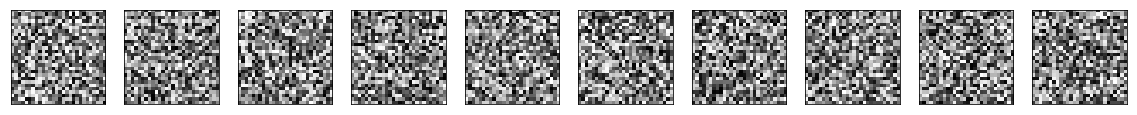

autoencoder 0


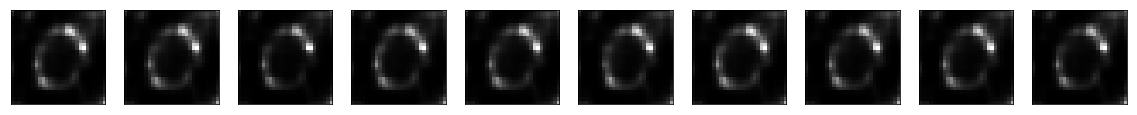

autoencoder 1


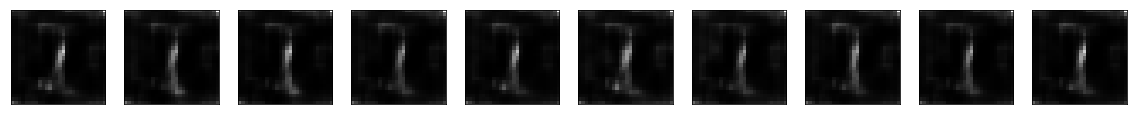

autoencoder 2


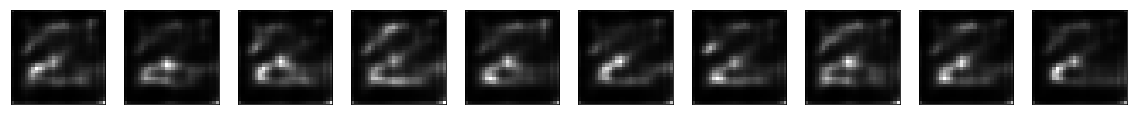

autoencoder 3


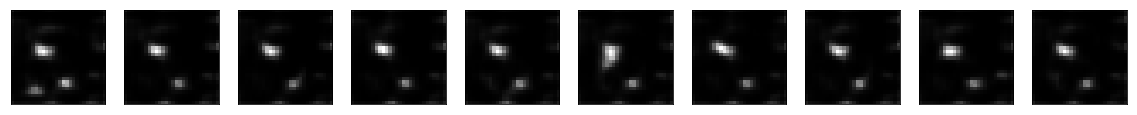

autoencoder 4


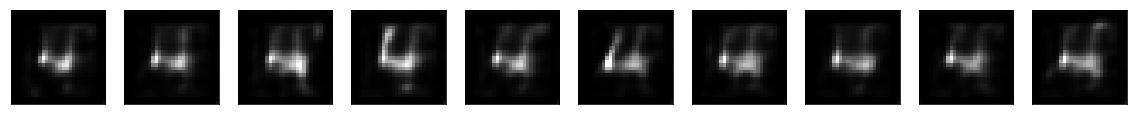

autoencoder 5


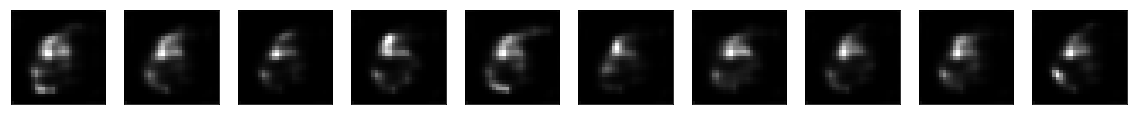

autoencoder 6


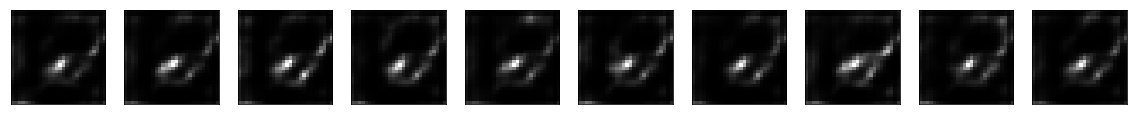

autoencoder 7


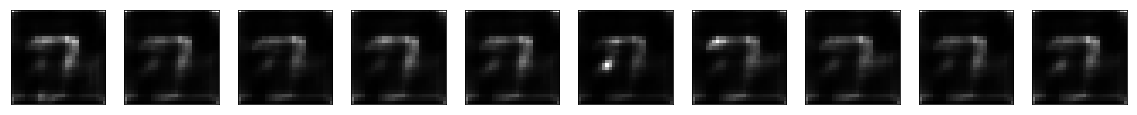

autoencoder 8


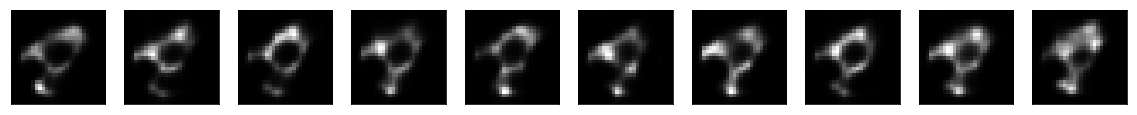

autoencoder 9


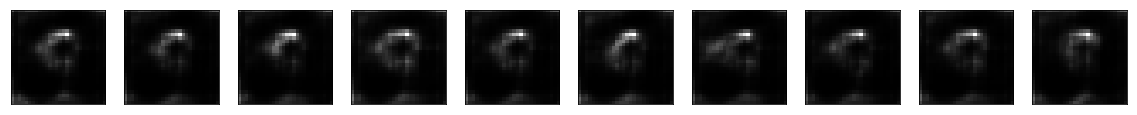

In [12]:
import math
b = math.sqrt(3.) * mnist_std
a = -b + mnist_mean
b += mnist_mean

uniform_data = np.random.uniform(low=a, high=b, size=(10000, 28, 28, 1))

print("ground truth")
show_10_images(uniform_data)
for i in range(10):
    print("autoencoder", i)
    show_10_images(autoencoders[i].predict(uniform_data))

In [13]:
labels = len(x_test) * [0] + len(uniform_data) * [1]
test_samples = np.concatenate((x_test, uniform_data))

losses = anomaly_detector.predict(test_samples)
losses = np.array(losses).T
losses = [min_max_scale_array(x, mins, maxes) for x in losses]
losses = np.min(losses, axis=1)

print("AUROC:", roc_auc_score(labels, losses))

AUROC: 1.0
